# KNN- K nearest Neighbors

Supervised machine learning algorithm used to solve both regression and classification problems, but mostly it is used for the Classification problems.          
K-NN is a non-parametric algorithm, which means it does not make any assumption on input data.       
It is also called a lazy learner algorithm as it performs action on training data at the time of classifiction. It does not learn from the training set instately instead it stores the dataset.         
KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.         

Steps of algorithm:   

Step-1: Select the number K of the neighbors.           
Step-2: Find the Euclidean distance of K number of neighbors.         
Step-3: Select the K nearest neighbors as per the calculated Euclidean distance.      
Step-4: Among these k neighbors, count the number of the data points in all category.      
Step-5: Assign the new data points to that category for which the count of the neighbor is maximum.      
Step-6: Our model is ready.     
 
There is no particular technique to determine the best value for "K", so we need to try some values to find the best out of them. The most preferred value for K is 5.     
A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.     


Algorithm assumes that similar things exist in close proximity, so it is based on distance between the two point.

##### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, r2_score

##### Read data from csv file

In [2]:
df = pd.read_csv('Social_Net_class.csv')

In [3]:
# Get first five records of dataframe

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


##### Sagrigate input from output

In [4]:
# Select Age and EstimatedSalary as features and check first two records

X = df.iloc[:, [2, 3]].values
X[:2]

array([[   19, 19000],
       [   35, 20000]], dtype=int64)

In [5]:
# Select purchased column as target, and check first two records

y = df.iloc[:, -1].values
y[:2]

array([0, 0], dtype=int64)

##### Apply split to get training and testing data
Apply 70% data for training and remaining for testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [7]:
# Check first four records of training data
X[:4]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000]], dtype=int64)

In [8]:
# Apply standard scalar for scalling

ss = StandardScaler()

In [9]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_train[:3]

array([[ 0.97500156,  1.38383659],
       [-0.8552766 ,  0.33825734],
       [ 0.97500156,  0.71582762]])

##### Apply K Nearest Neighbors Classifier for classification

In [10]:
# Select 5 neighbors

KNN = KNeighborsClassifier(n_neighbors = 3)

In [11]:
# Train the model

KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Predict class

y_predict = KNN.predict(X_test)
y_predict

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [13]:
# Check accuracy

KNN.score(X_test,y_predict)*100

100.0

##### Check classification report for accuracy

In [14]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        83
           1       0.82      0.89      0.86        37

    accuracy                           0.91       120
   macro avg       0.89      0.90      0.89       120
weighted avg       0.91      0.91      0.91       120



##### Check r2 score
It check how well the regression model fits the observed data

In [15]:
r2_score(y_test, y_predict) * 100


57.017258222077494

##### Check data distribution

In [16]:
a= df['EstimatedSalary'].values
b = df['Purchased'].values

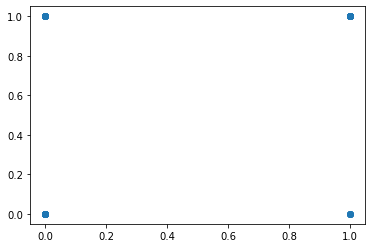

In [17]:
plt.scatter(y_test, y_predict)
plt.show()

In [18]:
(y_predict == y_test).sum()

109

In [19]:
y_test.size

120